In [1]:
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from configuration import config
config.pythonpath_fix()



def pil_from_tensor(tensor):
    return transforms.ToPILImage()(tensor)
    
def tensor_from_pil(img):
    return transforms.ToTensor()(img)

def show_tensor(tensor_img):
    plt.imshow(pil_from_tensor(tensor_img), cmap='gray', vmin=0, vmax=255)

In [10]:
from deepscm.datasets.morphomnist.transforms import SetThickness, ImageMorphology
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms


image = dataset[3]["image"]

morph = ImageMorphology(image, scale=16)
tmp_morphed_img = np.float32(SetThickness(1)(morph)) 
morphed_img = torch.as_tensor(morph.downscale(tmp_morphed_img))
images = torch.cat([image, morphed_img])
grid = make_grid(images, m)
show_tensor(grid)



NameError: name 'dataset' is not defined

54000
torch.Size([2, 1, 28, 28])


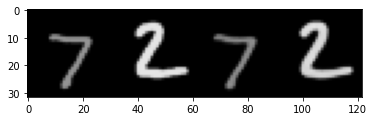

In [15]:
from ccbir.data import MorphoMNISTLikeDataModule
from ccbir.models import VQVAE
from torchvision.utils import make_grid
from torchvision import transforms

model = VQVAE.load_from_checkpoint(
    '/homes/mb8318/Documents/year4/ccbir/assets/synth-mnist-epoch=023-val_loss=0.0085513.ckpt')

dm = MorphoMNISTLikeDataModule()
dm.prepare_data()
dm.setup()
print(len(dm.mnist_train))
data_loader = dm.test_dataloader()
batch = next(iter(data_loader))
images = batch['image'][:2]
print(images.shape)
#show_tensor(make_grid(images, range=(0., 1.)))

reconstructions, _z_e, _z_q = model(images)
#reconstructions=torch.max(reconstructions, torch.tensor(0))
#reconstructions=torch.abs(reconstructions)
show_tensor(make_grid(torch.cat([images, reconstructions]), normalize=True, range=(-1,1)))

unprocessed=batch['image'][0]
